In [10]:
dataset_dest = '../../data/real_data/phys_attributes_data'

source_data = '/home/v_nikitin/data/APS/1104' # тут песчанник в москве на томографе 

# z-1 57 два разных образца
!cp -r {source_data} {dataset_dest}

In [11]:
import cv2
import matplotlib.pyplot as plt
import os
from PIL import Imag


# это чисто песок
data_path = '../../data/real_data/super_resolution/'
hr_path = os.path.join(data_path, 'exp4_roi_0_1867_rec') # 5x
lr_path = os.path.join(data_path, 'exp4_vertical_1860_1866_rec') # 1x

# тут шаг по z разный 3.13 микрометра для vertical
# а для roi_0; 3.13 / 5
# 0 - для одной вертикал может быть несколько roi


# между гранулами - гидрат( лед - из воды и газа)
len(os.listdir(lr_path)), len(os.listdir(hr_path))

(3095, 1026)

In [4]:
image_path

'../../data/real_data/super_resolution/exp4_roi_0_1867_rec/recon_00004.tiff'

In [9]:
import tifffile

image = tifffile.imread(image_path)
image.shape

(1224, 1224)

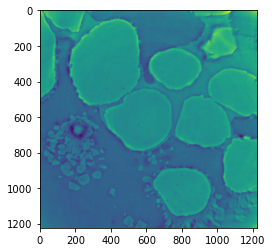

In [10]:
import matplotlib.pyplot as plt

plt.imshow(image)

In [6]:
!pip install tifffile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.9/178.9 kB 840.9 kB/s eta 0:00:00a 0:00:01


In [5]:
from diffusers import UNet2DModel


model = UNet2DModel(
            sample_size=256,  # the target image resolution
            in_channels=2,  # the number of input channels, 1 for low_res and 1 for noise
            out_channels=1,  # the number of output channels
            layers_per_block=2,  # how many ResNet layers to use per UNet block
            block_out_channels=(128, 128, 256, 256, 512, 512),  # the number of output channes for each UNet block
            down_block_types=(
                "DownBlock2D",  # a regular ResNet downsampling block
                "DownBlock2D",
                "DownBlock2D",
                "DownBlock2D",
                "AttnDownBlock2D",  # a ResNet downsampling block with spatial self-attention
                "DownBlock2D",
            ),
            up_block_types=(
                "UpBlock2D",  # a regular ResNet upsampling block
                "AttnUpBlock2D",  # a ResNet upsampling block with spatial self-attention
                "UpBlock2D",
                "UpBlock2D",
                "UpBlock2D",
                "UpBlock2D"
              ),
        )
# model

In [8]:
import torch
out = model(torch.ones((2, 2, 256, 256)),torch.ones((2,)))

In [10]:
out['sample']

tensor([[[[ 0.0036,  0.0206, -0.1573,  ...,  0.6529, -0.0728, -0.0375],
          [ 0.3043,  0.1400, -0.9828,  ...,  0.0909, -0.5680, -0.4012],
          [-0.2246,  1.1794,  0.3175,  ..., -0.0361,  0.7833, -0.9391],
          ...,
          [ 0.1736, -1.2435, -0.3487,  ..., -0.3466,  0.4175, -0.3118],
          [ 0.2144,  0.0695,  0.0733,  ...,  0.2107,  0.4140, -0.2703],
          [-0.2348,  0.0852, -0.0605,  ...,  0.0958,  0.3785, -0.1172]]],


        [[[ 0.0036,  0.0206, -0.1573,  ...,  0.6529, -0.0728, -0.0375],
          [ 0.3043,  0.1400, -0.9828,  ...,  0.0909, -0.5680, -0.4012],
          [-0.2246,  1.1794,  0.3175,  ..., -0.0361,  0.7833, -0.9391],
          ...,
          [ 0.1736, -1.2435, -0.3487,  ..., -0.3466,  0.4175, -0.3118],
          [ 0.2144,  0.0695,  0.0733,  ...,  0.2107,  0.4140, -0.2703],
          [-0.2348,  0.0852, -0.0605,  ...,  0.0958,  0.3785, -0.1172]]]],
       grad_fn=<ConvolutionBackward0>)

In [17]:
from PIL import Image
import torch

img = Image.fromarray(torch.ones(256, 256, dtype=float).numpy())